In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc
from datetime import datetime

In [3]:
# Load the dataset
# put your file path here
file_path_1 = 'Netflix_cleaned_1.csv'
file_path_2 = 'Hulu_cleaned_1.csv'
df_netflix = pd.read_csv(file_path_1)
df_hulu = pd.read_csv(file_path_2)

In [8]:
hulu_columns = list(df_hulu.columns)
netflix_columns = list(df_netflix.columns)
unique_to_hulu = set(hulu_columns) - set(netflix_columns)
unique_to_netflix = set(netflix_columns) - set(hulu_columns)
print("Columns unique to Hulu:", unique_to_hulu)
print("Columns unique to Netflix:", unique_to_netflix)

Columns unique to Hulu: set()
Columns unique to Netflix: set()


In [11]:
# Order columns alphabetically
df_hulu = df_hulu[sorted(df_hulu.columns)]
df_netflix = df_netflix[sorted(df_netflix.columns)]

# Add the service column
df_hulu['service'] = 'hulu'
df_netflix['service'] = 'netflix'

# Combine the dataframes
combined_df = pd.concat([df_hulu, df_netflix], ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)

In [12]:
df = pd.read_csv('combined_data.csv')

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [16]:
df.head()

,cast,continent,country,country_cleaned,date_added,day,description,difference,director,duration,...,duration_season,listed_in,month,rating,release_year,show_id,title,type,year,service
0,NaN,north america,united states,missing,2021-10-15,15,america's story can be told in many ways. whil...,117,missing,1 season,...,1,"documentaries, history",10,tv-14,2012,s18,america's book of secrets,tv show,2021,hulu
1,NaN,north america,united states,missing,2021-10-15,15,beyond scared straight profiles the new approa...,129,missing,6 seasons,...,6,"documentaries, reality, teen",10,tv-14,2011,s20,beyond scared straight,tv show,2021,hulu
2,NaN,north america,united states,missing,2021-10-15,15,"in little women: atlanta, the little ladies tu...",69,missing,2 seasons,...,2,"black stories, reality",10,tv-14,2016,s23,little women: atlanta,tv show,2021,hulu
3,NaN,north america,united states,missing,2021-10-15,15,"""nightwatch"" follows the dangerous stretch of ...",81,missing,4 seasons,...,4,"documentaries, drama, mystery",10,tv-14,2015,s25,nightwatch,tv show,2021,hulu
4,NaN,north america,united states,missing,2021-10-15,15,deep in the heart of louisiana lies america's ...,141,missing,3 seasons,...,3,"documentaries, reality",10,tv-pg,2010,s28,swamp people,tv show,2021,hulu


In [17]:
'''
#3 (victor)
Question: what age group are they targeting distrution of rating
Columns req: "rating", count of "type", "year" (maybe to show the trend in target audience)
comments:
Business perspective:
more content in the rating of "anyone can watch sort of type" means that
the range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)
'''

'\n#3 (victor)\nQuestion: what age group are they targeting distrution of rating\nColumns req: "rating", count of "type", "year" (maybe to show the trend in target audience)\ncomments:\nBusiness perspective:\nmore content in the rating of "anyone can watch sort of type" means that\nthe range and count of target audiences more thus increasing the subscriptions (??? not quite sure here as well)\n'

In [18]:
list(df['rating'].unique())

['tv-14',
 'tv-pg',
 'pg-13',
 'tv-ma',
 'r',
 'tv-g',
 'pg',
 'tv-y7',
 'tv-y',
 'g',
 'nc-17',
 'nr',
 'tv-y7-fv',
 'ur']

In [19]:
sorted(df['release_year'].unique())

[np.int64(2010),
 np.int64(2011),
 np.int64(2012),
 np.int64(2013),
 np.int64(2014),
 np.int64(2015),
 np.int64(2016),
 np.int64(2017),
 np.int64(2018),
 np.int64(2019),
 np.int64(2020),
 np.int64(2021)]

In [20]:
list(df['year'].unique())

[np.int64(2021),
 np.int64(2020),
 np.int64(2019),
 np.int64(2018),
 np.int64(2017),
 np.int64(2016),
 np.int64(2015),
 np.int64(2014),
 np.int64(2013),
 np.int64(2012),
 np.int64(2011)]

In [21]:
# Ensure the mapping for age groups includes all unique ratings
age_groups = {
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-PG': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-MA': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids',
    'pg-13': 'Teens',
    'tv-ma': 'Adults',
    'pg': 'Teens',
    'tv-14': 'Teens',
    'tv-pg': 'Teens',
    'tv-y': 'Kids',
    'tv-y7': 'Kids',
    'r': 'Adults',
    'tv-g': 'Kids',
    'g': 'Kids',
    'nc-17': 'Adults',
    'nr': 'Adults',
    'tv-y7-fv': 'Kids',
    'ur': 'Adults'
}

df['age_group'] = df['rating'].map(age_groups)

In [24]:
filther_col = ['type', 'release_year', 'age_group', 'year', 'service']
df_age = df[filther_col]
df_age.head()

,type,release_year,age_group,year,service
0,tv show,2012,Teens,2021,hulu
1,tv show,2011,Teens,2021,hulu
2,tv show,2016,Teens,2021,hulu
3,tv show,2015,Teens,2021,hulu
4,tv show,2010,Teens,2021,hulu


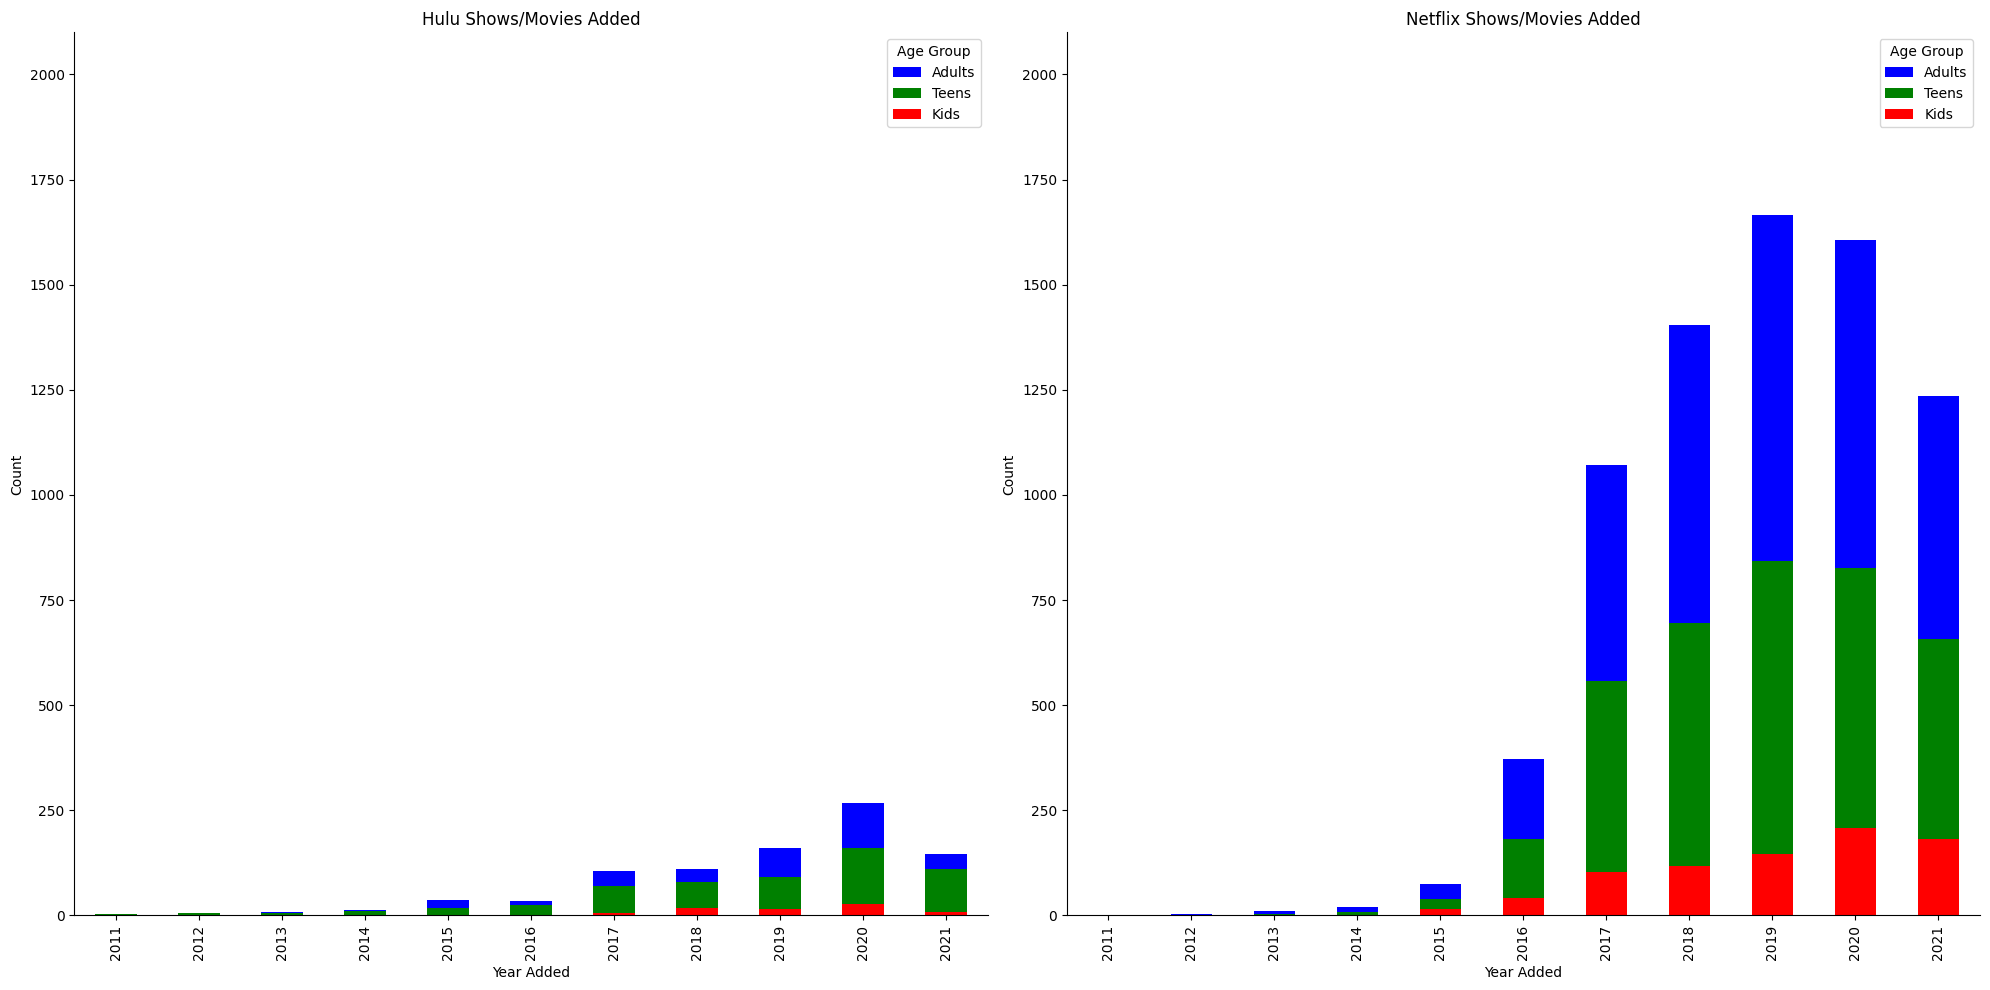

In [81]:
# Split the data into Hulu and Netflix
df_hulu = df_age[df_age['service'] == 'hulu']
df_netflix = df_age[df_age['service'] == 'netflix']

# Group by year and age group for Hulu
year_added_age_group_hulu = df_hulu.groupby(['year', 'age_group']).size().unstack(fill_value=0)

# Group by year and age group for Netflix
year_added_age_group_netflix = df_netflix.groupby(['year', 'age_group']).size().unstack(fill_value=0)

# Desired order
desired_order = ['Kids', 'Teens', 'Adults']

# Reorder the columns of the DataFrame for Hulu
year_added_age_group_hulu = year_added_age_group_hulu[desired_order]

# Reorder the columns of the DataFrame for Netflix
year_added_age_group_netflix = year_added_age_group_netflix[desired_order]

# Define colors for each age group
colors = ['red', 'green', 'blue']

# Plotting the charts
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Age group targeting by year shows/movies added to Hulu
year_added_age_group_hulu.plot(kind='bar', stacked=True, ax=axes[0], color=colors)
axes[0].set_title('Hulu Shows/Movies Added')
axes[0].set_xlabel('Year Added')
axes[0].set_ylabel('Count')
axes[0].set_ylim(0, 2100)  # Set the y-axis limit
axes[0].legend(title='Age Group')

# Plot 2: Age group targeting by year shows/movies added to Netflix
year_added_age_group_netflix.plot(kind='bar', stacked=True, ax=axes[1], color=colors)
axes[1].set_title('Netflix Shows/Movies Added')
axes[1].set_xlabel('Year Added')
axes[1].set_ylabel('Count')
axes[1].set_ylim(0, 2100)  # Set the y-axis limit
axes[1].legend(title='Age Group')

# Get rid of spines
for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Custom legend order
for ax in axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    order = [2, 1, 0]  # Adults, Teens, Kids
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Age Group')

plt.tight_layout()
plt.show()

* Both Hulu and Netflix have strategic content additions that cater to different age groups, with a notable emphasis on teens and adults.
* Netflix’s diverse and increasing content for adults and teens highlights its focus on these demographics, ensuring that subscribers in these groups have plenty of new content to explore each year.
* Hulu’s consistent addition of TV shows, particularly for teens and adults, makes it a strong contender for viewers who prefer series-based content.

In [10]:
'''
#6 (victor)
Question: use quarterly data to get counts of type released and see what types of shows are popular during which season
comments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?
'''

'\n#6 (victor)\nQuestion: use quarterly data to get counts of type released and see what types of shows are popular during which season\ncomments: Since most people have holidays in Dec/Jan, is the content more likely around tht season?\n'

/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_12834/1618087127.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_12834/1618087127.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/ipykernel_12834/1618087127.py:28: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/hb/60c6m96123sbxhdf8p4mnz6c0000gn/T/

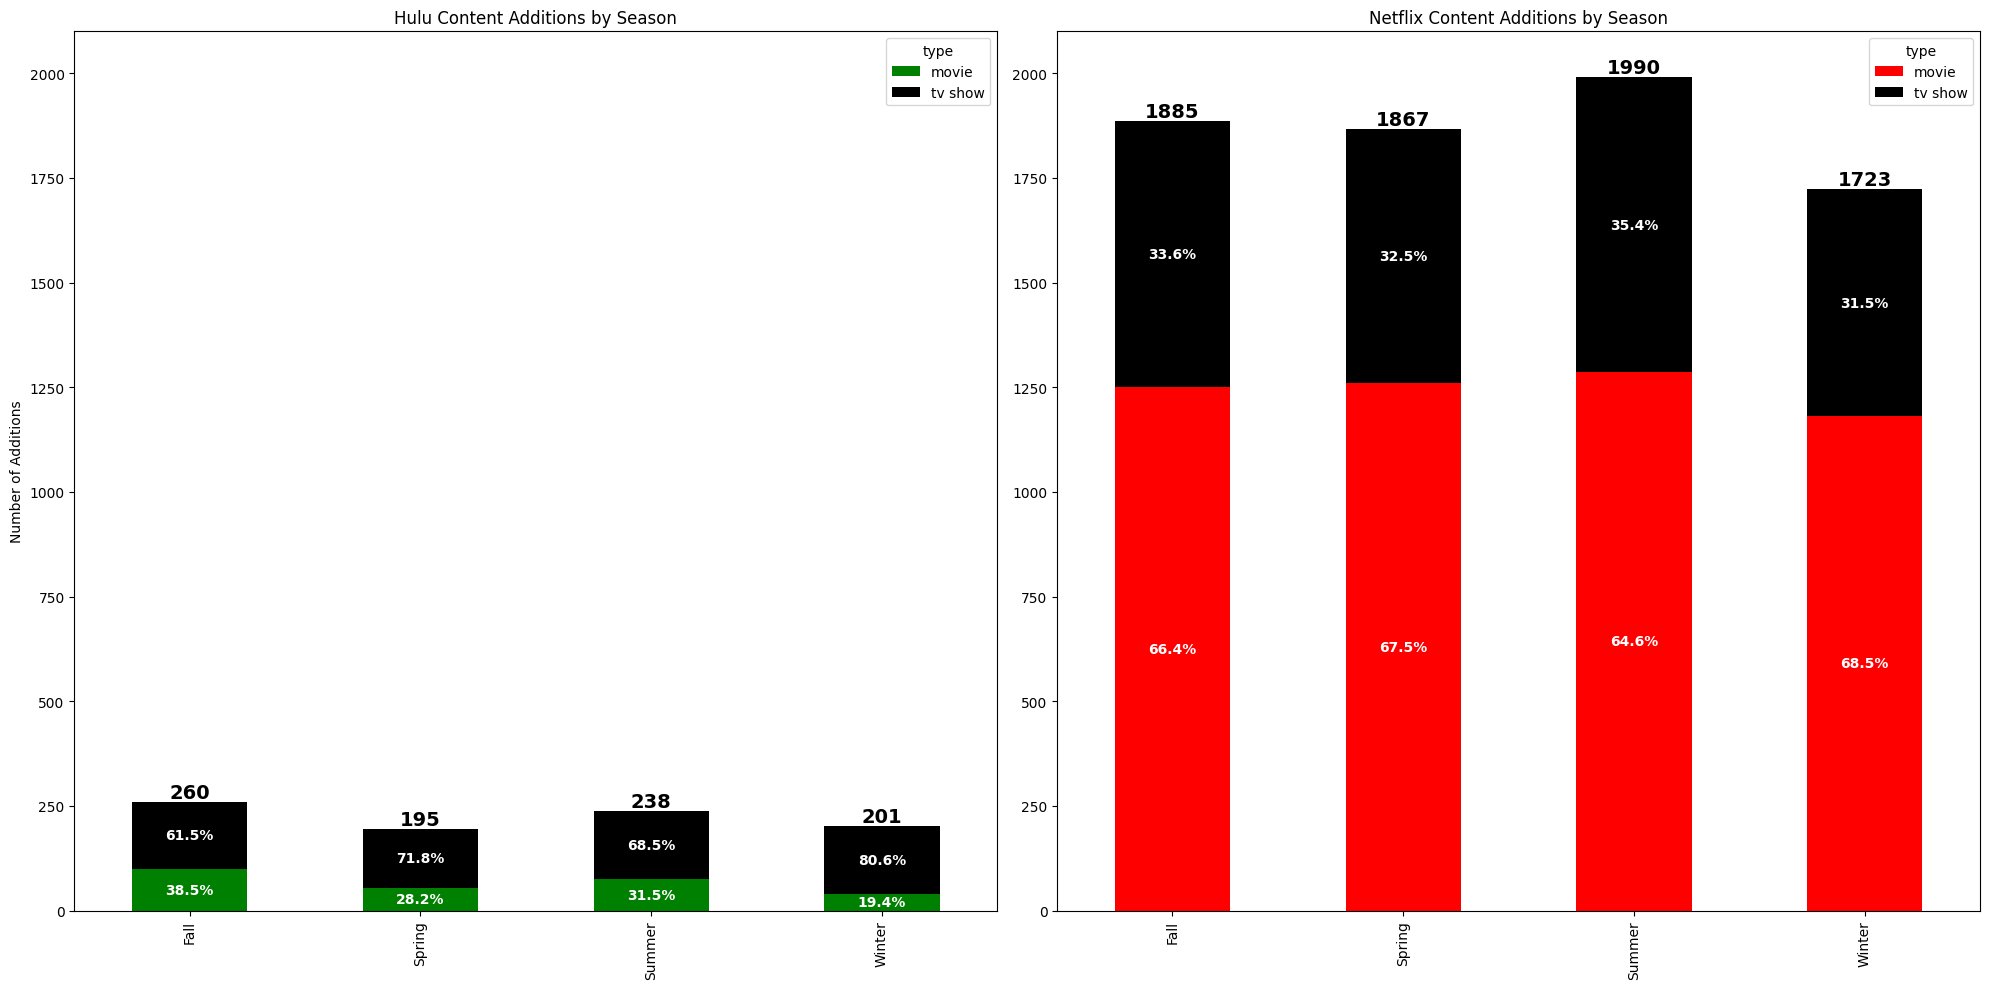

In [79]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Map quarters to seasons
df['season_added'] = df['date_added'].dt.quarter.map({
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
})

# Split the data into Hulu and Netflix
df_hulu = df[df['service'] == 'hulu']
df_netflix = df[df['service'] == 'netflix']

# Group by season and type to get the counts for Hulu
df_seasonal_hulu = df_hulu.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Group by season and type to get the counts for Netflix
df_seasonal_netflix = df_netflix.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Updated function to calculate percentages and totals correctly
def add_annotations(ax, df):
    for container in ax.containers:
        totals = df.sum(axis=1)
        for i, bar in enumerate(container):
            height = bar.get_height()
            percentage = height / totals[i] * 100
            ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=10, color='white', weight='bold')

    for i, total in enumerate(df.sum(axis=1)):
        ax.annotate(f'{total}', (i, total),
                    ha='center', va='bottom', fontsize=14, color='black', weight='bold')

# Determine the maximum y-axis limit
max_y = max(df_seasonal_hulu.values.max(), df_seasonal_netflix.values.max())

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Hulu
df_seasonal_hulu.plot(kind='bar', stacked=True, ax=ax1, color=['green', 'black'])
ax1.set_title('Hulu Content Additions by Season')
ax1.set_xlabel('')
ax1.set_ylabel('Number of Additions')
ax1.set_ylim(0, 2100)  # Set the y-axis limit
add_annotations(ax1, df_seasonal_hulu)

# Netflix
df_seasonal_netflix.plot(kind='bar', stacked=True, ax=ax2, color=['red', 'black'])
ax2.set_title('Netflix Content Additions by Season')
ax2.set_xlabel('')
ax2.set_ylim(0, 2100)  # Set the y-axis limit
add_annotations(ax2, df_seasonal_netflix)

plt.tight_layout()
plt.show()

# Seasonal Content Additions on Hulu and Netflix

## Key Findings:
- **Hulu:**
  - **Content Peaks:** Highest number of new shows and movies in Fall
  - **Focus:** Majority of new content are TV shows, offering plenty of series to binge-watch.
  - **Numbers:** only adds around 200 shows/movies per season
- **Netflix:**
  - **Content Peaks:** consistent content additions across all seasons
  - **Focus:** Majority of new content are Moives, offering endless moive nights.
  - **Numbers:** adds a whompy 1800 shows/movies per season

## Customer Insights:
- **Hulu:**
  - **Variety:** Expect a rich selection of TV shows, especially in Fall. Ideal for those who love following multiple series.
  - **New Additions:** Keep an eye out for significant updates in Fall
- **Netflix:**
  - **Diverse Options:** Enjoy a balanced variety of movies and TV shows and endless selections.
  - **Year-Round Updates:** Benefit from consistent content updates

## Conclusion
- **Recommendation:** From a customer's point of view, Netflix is the better choice due to the sheer amount of selctions whehter its TV shows or movies. Netflix has consistent amount of content year-round updates and its diverse options ensure that there is always something new and exciting to watch, catering to a wide range of viewing preferences.